In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./merged_all_normalized.csv")

In [3]:
df

,chrom,start,end,Fresh,Fix,HexFix
0,chr10,3117593,3117993,3.043850,2.842246,2.647471
1,chr10,3172364,3172764,2.541208,3.128098,2.743539
2,chr10,3172903,3173303,3.430700,3.991285,3.250900
3,chr10,3181097,3181497,2.216993,3.040257,2.425915
4,chr10,3191617,3192017,2.434435,2.842246,1.776950
...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205


In [4]:
df['diff1'] = df['Fresh'] - df['Fix']
df['diff2'] = df['Fix'] - df['HexFix']

In [5]:
df

,chrom,start,end,Fresh,Fix,HexFix,diff1,diff2
0,chr10,3117593,3117993,3.043850,2.842246,2.647471,0.201604,0.194775
1,chr10,3172364,3172764,2.541208,3.128098,2.743539,-0.586890,0.384559
2,chr10,3172903,3173303,3.430700,3.991285,3.250900,-0.560585,0.740385
3,chr10,3181097,3181497,2.216993,3.040257,2.425915,-0.823264,0.614342
4,chr10,3191617,3192017,2.434435,2.842246,1.776950,-0.407812,1.065296
...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086,-1.191810,0.733056
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393,-0.142657,-0.158418
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768,-0.636895,0.462058
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205,0.700994,-0.884701


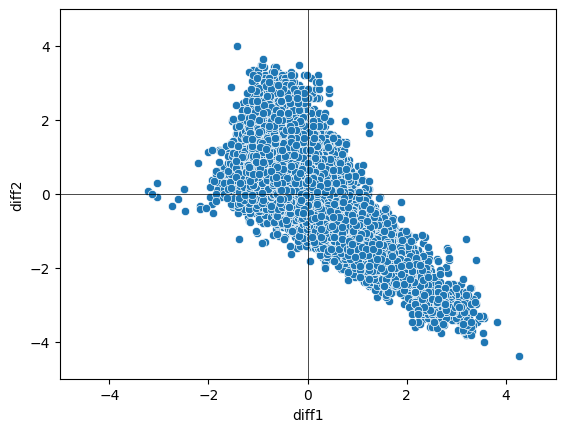

In [6]:
sns.scatterplot(data=df, x='diff1', y='diff2')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

In [7]:
from sklearn.cluster import KMeans
data = df[['diff1', 'diff2']]

D:\python\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\python\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\python\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\python\lib\site-packages\sklear

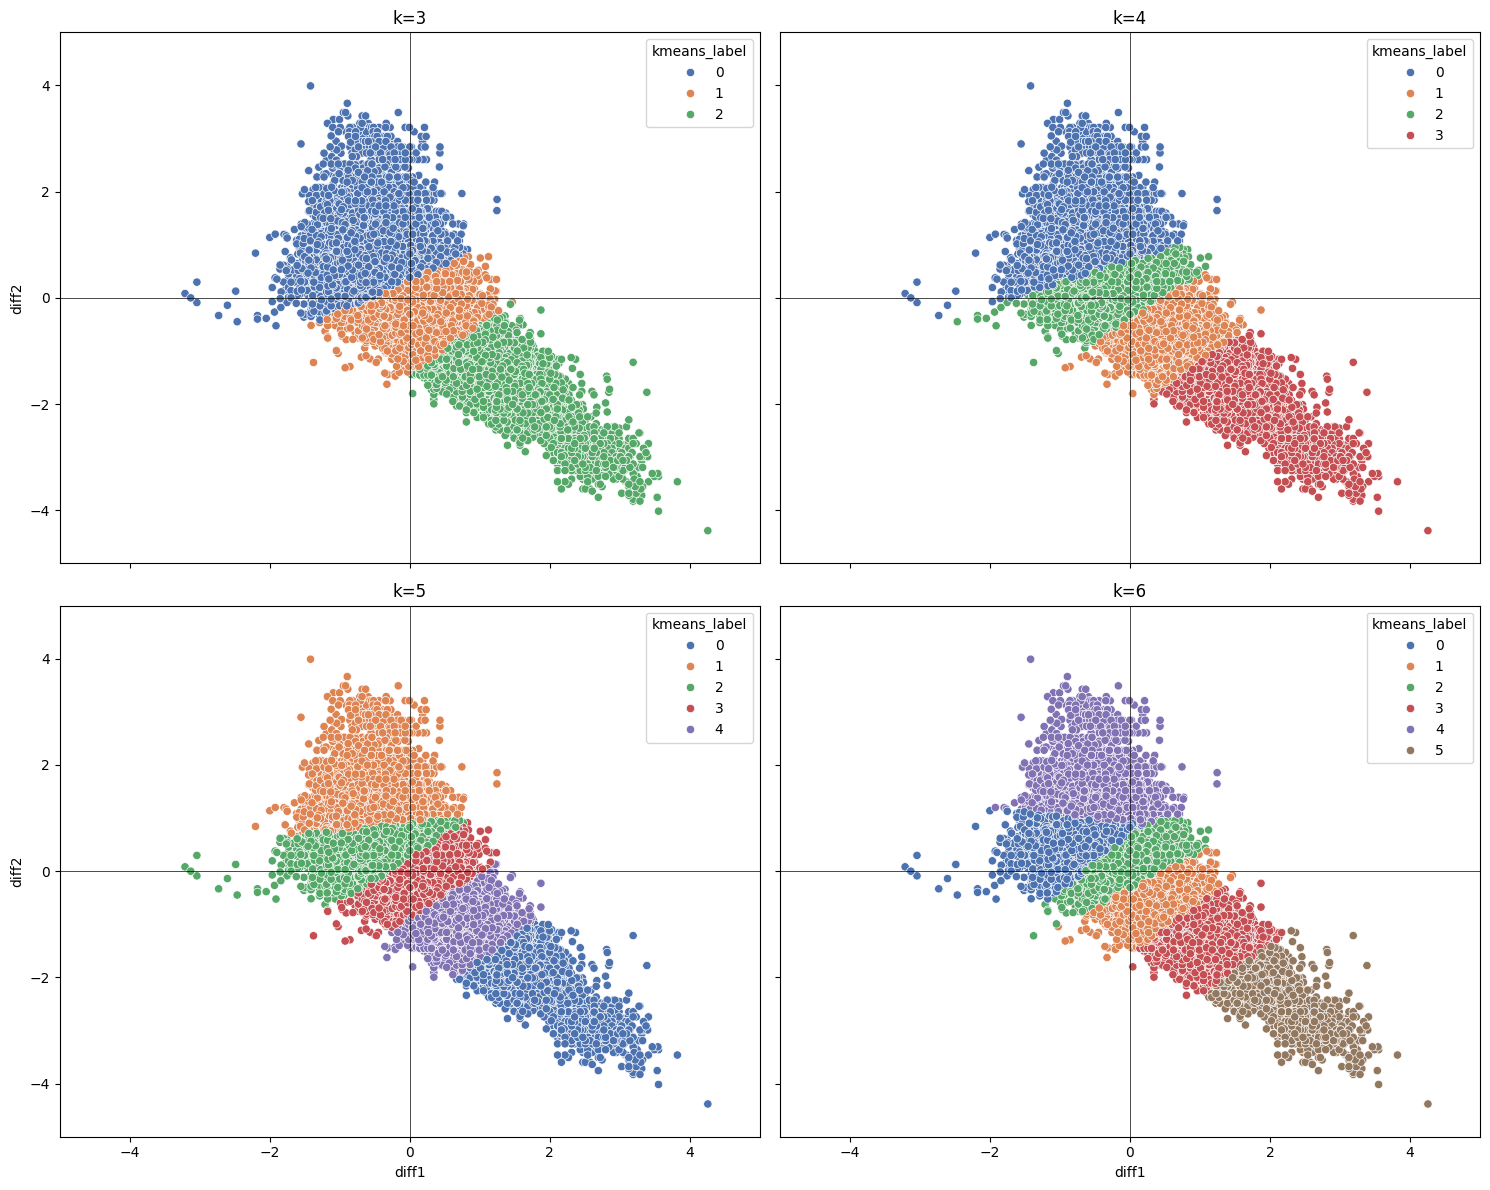

In [8]:
k_values = [3, 4, 5, 6]

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k)
    df['kmeans_label'] = kmeans.fit_predict(data)
    
    sns.scatterplot(data=df, x='diff1', y='diff2', hue='kmeans_label', palette='deep', ax=ax)
    ax.set_title(f'k={k}')
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()


In [9]:
k = 5
kmeans = KMeans(n_clusters = k)
kmeans.fit(data)
df['kmeans_label'] = kmeans.predict(data)
df

D:\python\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\python\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\python\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\python\lib\site-packages\sklear

,chrom,start,end,Fresh,Fix,HexFix,diff1,diff2,kmeans_label
0,chr10,3117593,3117993,3.043850,2.842246,2.647471,0.201604,0.194775,2
1,chr10,3172364,3172764,2.541208,3.128098,2.743539,-0.586890,0.384559,0
2,chr10,3172903,3173303,3.430700,3.991285,3.250900,-0.560585,0.740385,0
3,chr10,3181097,3181497,2.216993,3.040257,2.425915,-0.823264,0.614342,0
4,chr10,3191617,3192017,2.434435,2.842246,1.776950,-0.407812,1.065296,3
...,...,...,...,...,...,...,...,...,...
68804,chrY,90807654,90808054,3.641332,4.833141,4.100086,-1.191810,0.733056,0
68805,chrY,90808489,90808889,3.624318,3.766975,3.925393,-0.142657,-0.158418,2
68806,chrY,90810605,90811005,3.542931,4.179826,3.717768,-0.636895,0.462058,0
68807,chrY,90825230,90825630,3.007498,2.306504,3.191205,0.700994,-0.884701,1


In [10]:
cluster_means = df.groupby('kmeans_label')[['diff1', 'diff2']].mean()
cluster_means

,diff1,diff2
kmeans_label,,
0,-0.432720,0.406446
1,0.713944,-0.942020
2,0.087102,-0.208641
3,-0.549190,1.279988
4,1.739027,-2.016596


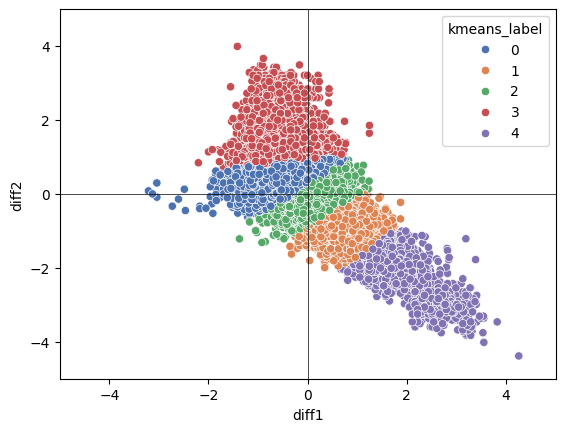

In [11]:
sns.scatterplot(data=df, x='diff1', y='diff2', hue='kmeans_label', palette='deep')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

In [16]:
len(df[df['kmeans_label'] == 4])

3492

In [13]:
df = df.drop(['Fresh', 'Fix', 'HexFix', 'diff1', 'diff2'], axis=1)

In [14]:
df

,chrom,start,end,kmeans_label
0,chr10,3117593,3117993,2
1,chr10,3172364,3172764,0
2,chr10,3172903,3173303,0
3,chr10,3181097,3181497,0
4,chr10,3191617,3192017,3
...,...,...,...,...
68804,chrY,90807654,90808054,0
68805,chrY,90808489,90808889,2
68806,chrY,90810605,90811005,0
68807,chrY,90825230,90825630,1


In [15]:
df.to_csv("kmeans.csv", index=False)